In [1]:
# Standard imports
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
from tqdm import tqdm

## Step 1: Style Transfer CNN

In [2]:
# Uses VGG19 imported from torchvision.models.vgg19
# Uses Caltech-101 image data set

ds_c101 = torchvision.datasets.Caltech101('./files/', download=True,
                                          transform=T.Compose([
                                          T.ToTensor(),
                                          
                                      ]))

#weights = torchvision.models.get_model_weights("vgg19")
weights = torchvision.models.VGG19_Weights.DEFAULT
model_vgg19 = torchvision.models.vgg19(weights=weights)
model_vgg19.eval()
#T.Lambda((lambda x: torch.flatten(x))),
# Resize(513),


Files already downloaded and verified


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [3]:
content_path1 = "garfield_image_0013.jpg"
content_path2 = "image_0013.jpg"
style_path1 = "image05.jpeg"
style_path2 = "image_sunflower.jpeg"

In [4]:
def draw(x):
    '''Displays a flattened image, modified from A5'''
    with torch.no_grad():
        x = x.numpy().transpose(1, 2, 0)
        plt.imshow(x);
        plt.axis('off');

In [5]:
def decodeImage(x):
    '''Converts an image to a tensor'''
    img_size = 32
    loader = torchvision.transforms.Compose([
        torchvision.transforms.ToPILImage(),
        torchvision.transforms.Resize(128),
        torchvision.transforms.ToTensor()
    ])
    img = torchvision.io.read_image(x)
    img = loader(img)
    #img = torchvision.io.decode_image(img)
    return img

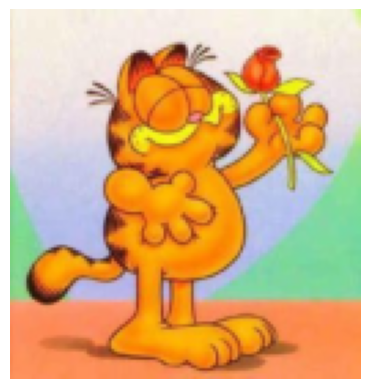

In [6]:
content_input1 = decodeImage(content_path1)
draw(content_input1)


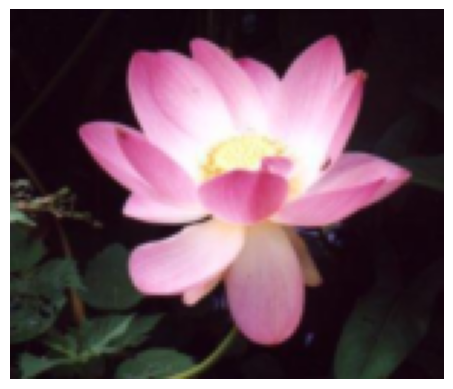

In [7]:
content_input2 = decodeImage(content_path2)
draw(content_input2)

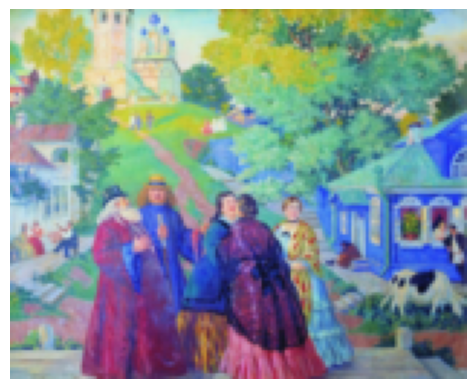

In [8]:
style_input1 = decodeImage(style_path1)
draw(style_input1)

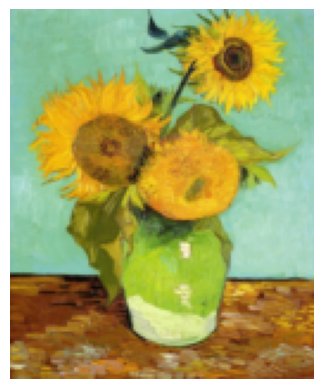

In [9]:
style_input2 = decodeImage(style_path2)
draw(style_input2)

In [10]:
# Preprocess weights and apply to input images
preprocess = weights.transforms()
content_input1_t = preprocess(content_input1).unsqueeze(0)
content_input2_t = preprocess(content_input2).unsqueeze(0)
style_input1_t = preprocess(style_input1).unsqueeze(0)
style_input2_t = preprocess(style_input2).unsqueeze(0)

prob = model_vgg19(content_input1_t)


In [11]:
print(prob.shape)

torch.Size([1, 1000])


In [12]:
pred = prob.squeeze(0).softmax(0)
class_id = pred.argmax().item()
score = pred[class_id].item()
name = weights.meta["categories"][class_id]
print(f"{name}: {100 * score:.1f}%")

comic book: 22.6%


In [13]:
prob2 = model_vgg19(content_input2_t)
pred = prob2.squeeze(0).softmax(0)
class_id = pred.argmax().item()
score = pred[class_id].item()
name = weights.meta["categories"][class_id]
print(f"{name}: {100 * score:.1f}%")

daisy: 95.3%


In [14]:
import torchvision.models.feature_extraction

train_nodes, _ = torchvision.models.feature_extraction.get_graph_node_names(model_vgg19)

print(train_nodes)

['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'features.13', 'features.14', 'features.15', 'features.16', 'features.17', 'features.18', 'features.19', 'features.20', 'features.21', 'features.22', 'features.23', 'features.24', 'features.25', 'features.26', 'features.27', 'features.28', 'features.29', 'features.30', 'features.31', 'features.32', 'features.33', 'features.34', 'features.35', 'features.36', 'avgpool', 'flatten', 'classifier.0', 'classifier.1', 'classifier.2', 'classifier.3', 'classifier.4', 'classifier.5', 'classifier.6']


In [15]:
train_nodes_test, _ = torchvision.models.feature_extraction.get_graph_node_names(torchvision.models.vgg19().features)
print(train_nodes_test)

['input', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']


In [16]:
train_nodes_test, _ = torchvision.models.feature_extraction.get_graph_node_names(torchvision.models.resnet50())
print(train_nodes_test)

['x', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.relu_1', 'layer1.0.conv3', 'layer1.0.bn3', 'layer1.0.downsample.0', 'layer1.0.downsample.1', 'layer1.0.add', 'layer1.0.relu_2', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.relu_1', 'layer1.1.conv3', 'layer1.1.bn3', 'layer1.1.add', 'layer1.1.relu_2', 'layer1.2.conv1', 'layer1.2.bn1', 'layer1.2.relu', 'layer1.2.conv2', 'layer1.2.bn2', 'layer1.2.relu_1', 'layer1.2.conv3', 'layer1.2.bn3', 'layer1.2.add', 'layer1.2.relu_2', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.relu_1', 'layer2.0.conv3', 'layer2.0.bn3', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.0.add', 'layer2.0.relu_2', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.relu_1', 'layer2.1.conv3', 'layer2.1.bn3', 'layer2.1.add', 'layer2.1.rel

In [17]:
content_nodes = ['features.36']
style_nodes = ['features.5', 'features.10', 'features.15', 'features.20']

In [ ]:
# class modifiedVGG19(model_vgg19):
#     """Overrides the forward method to extract the intermediate outputs"""
#     def __init__(self, *args, **kwargs):
#         super().__init__(*args, **kwargs)
    
#     def forward(self, x1: torch.Tensor) -> torch.Tensor:
#         x1 = self.features(x1)
#         x1 = self.avgpool(x1)
#         x1 = torch.flatten(x, 1)
#         self.classifier = nn.Sequential(
#             nn.Linear(512 * 7 * 7, 4096),
#             nn.ReLU(True),
#             nn.Dropout(p=dropout),
#             nn.Linear(4096, 4096),
#             nn.ReLU(True),
#             nn.Dropout(p=dropout),
#             nn.Linear(4096, num_classes),
#         )
        
        

In [19]:
"""From PyTorch Tutorial"""
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super(ContentLoss, self).__init__()
        # we 'detach' the target content from the tree used
        # to dynamically compute the gradient: this is a stated value,
        # not a variable. Otherwise the forward method of the criterion
        # will throw an error.
        self.target = target.detach()

    def forward(self, input):
        self.loss = torch.nn.functional.mse_loss(input, self.target)
        return input

def gram_matrix(input):
    a, b, c, d = input.size()  # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)

    features = input.view(a * b, c * d)  # resize F_XL into \hat F_XL

    G = torch.mm(features, features.t())  # compute the gram product

    # we 'normalize' the values of the gram matrix
    # by dividing by the number of element in each feature maps.
    return G.div(a * b * c * d)

class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = torch.nn.functional.mse_loss(G, self.target)
        return input

In [76]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406])
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225])

# create a module to normalize input image so we can easily put it in a
# ``nn.Sequential``
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        # .view the mean and std to make them [C x 1 x 1] so that they can
        # directly work with image Tensor of shape [B x C x H x W].
        # B is batch size. C is number of channels. H is height and W is width.
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # normalize ``img``
        return (img - self.mean) / self.std

# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    # normalization module
    normalization = Normalization(normalization_mean, normalization_std)

    # just in order to have an iterable access to or list of content/style
    # losses
    content_losses = []
    style_losses = []

    # assuming that ``cnn`` is a ``nn.Sequential``, so we make a new ``nn.Sequential``
    # to put in modules that are supposed to be activated sequentially
    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # The in-place version doesn't play very nicely with the ``ContentLoss``
            # and ``StyleLoss`` we insert below. So we replace with out-of-place
            # ones here.
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            # add content loss:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # add style loss:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    optimizer = torch.optim.LBFGS([input_img])
    return optimizer

def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=1000000, content_weight=1):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)

    # We want to optimize the input and not the model parameters so we
    # update all the requires_grad fields accordingly
    input_img.requires_grad_(True)
    # We also put the model in evaluation mode, so that specific layers
    # such as dropout or batch normalization layers behave correctly.
    model.eval()
    model.requires_grad_(False)

    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            # correct the values of updated input image
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            loss.backward()

            run[0] += 1
            if run[0] % 50 == 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return style_score + content_score

        optimizer.step(closure)

    #a last correction...
    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img

In [21]:
input_test = content_input1_t.clone()

In [22]:
output = run_style_transfer(model_vgg19.features, cnn_normalization_mean, cnn_normalization_std,
                            content_input1_t, style_input1_t, input_test)



Building the style transfer model..


C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3624840456.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3624840456.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [50]:
Style Loss : 3036585.000000 Content Loss: 433.354004

run [100]:
Style Loss : 3036748.500000 Content Loss: 433.374603

run [150]:
Style Loss : 3036748.500000 Content Loss: 433.374603

run [200]:
Style Loss : 3036748.500000 Content Loss: 433.374603

run [250]:
Style Loss : 3036748.500000 Content Loss: 433.374603

run [300]:
Style Loss : 3036748.500000 Content Loss: 433.374603



In [25]:
print(output.shape)

torch.Size([1, 3, 224, 224])


torch.Size([3, 224, 224])


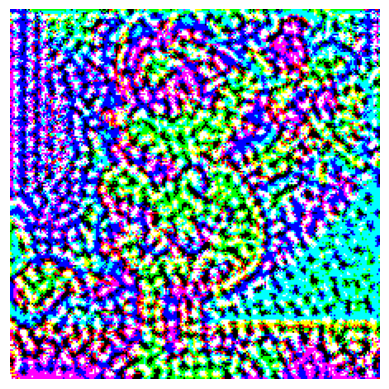

In [46]:

test = output.squeeze()
print(test.shape)
draw(test)

In [47]:
input_test2 = content_input2_t.clone()
output2 = run_style_transfer(model_vgg19.features, cnn_normalization_mean, cnn_normalization_std,
                            content_input2_t, style_input2_t, input_test2)



Building the style transfer model..


C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3624840456.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3624840456.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [50]:
Style Loss : 9707840.000000 Content Loss: 632.069519

run [100]:
Style Loss : 2456575.500000 Content Loss: 557.378357

run [150]:
Style Loss : 2456575.500000 Content Loss: 557.378357

run [200]:
Style Loss : 2456575.500000 Content Loss: 557.378357

run [250]:
Style Loss : 2456575.500000 Content Loss: 557.378357

run [300]:
Style Loss : 2456575.500000 Content Loss: 557.378357



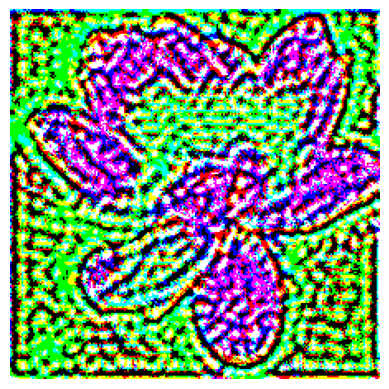

In [48]:
draw(output2.squeeze())

In [57]:
test_output = run_style_transfer(torchvision.models.vgg19().features.eval(), cnn_normalization_mean, cnn_normalization_std,
                            content_input2_t, style_input2_t, input_test2)

Building the style transfer model..


C:\Users\julie\AppData\Local\Temp\ipykernel_10636\1673465787.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
C:\Users\julie\AppData\Local\Temp\ipykernel_10636\1673465787.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [50]:
Style Loss : 844.365540 Content Loss: 3.177912

run [100]:
Style Loss : 844.365540 Content Loss: 3.177912

run [150]:
Style Loss : 844.365540 Content Loss: 3.177912

run [200]:
Style Loss : 844.365540 Content Loss: 3.177912

run [250]:
Style Loss : 844.365540 Content Loss: 3.177912

run [300]:
Style Loss : 844.365540 Content Loss: 3.177912



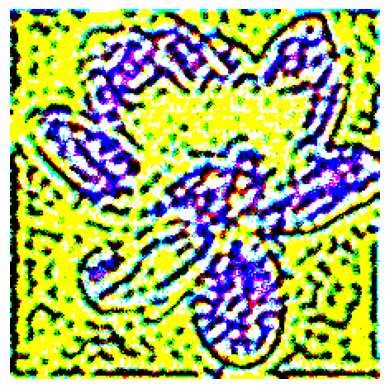

In [58]:
draw(test_output.squeeze())

In [55]:
print(style_input1_t.shape)

torch.Size([1, 3, 224, 224])


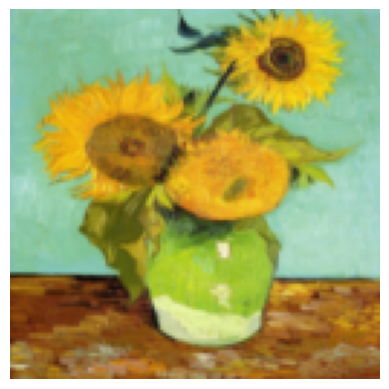

In [61]:
loader2 = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize([128, 128]),
    torchvision.transforms.ToTensor()
])
test_img2 = loader2(content_input2)
draw(test_img2)
test_style2 = loader2(style_input2)
draw(test_style2)

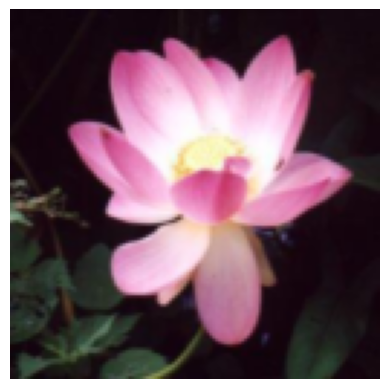

In [66]:
draw(test_img2)

In [62]:
test_style2_t = preprocess(test_style2).unsqueeze(0)
test_content2_t = preprocess(test_img2).unsqueeze(0)

In [63]:
test_output2 = run_style_transfer(torchvision.models.vgg19().features.eval(), cnn_normalization_mean, cnn_normalization_std,
                            test_content2_t, test_style2_t, test_content2_t.clone())

Building the style transfer model..


C:\Users\julie\AppData\Local\Temp\ipykernel_10636\1673465787.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
C:\Users\julie\AppData\Local\Temp\ipykernel_10636\1673465787.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [50]:
Style Loss : 2114.979248 Content Loss: 1.114470

run [100]:
Style Loss : 2101.031006 Content Loss: 1.106762

run [150]:
Style Loss : 2089.782715 Content Loss: 1.100952

run [200]:
Style Loss : 2086.344971 Content Loss: 1.101292

run [250]:
Style Loss : 2084.665283 Content Loss: 1.101708

run [300]:
Style Loss : 2083.567871 Content Loss: 1.102039



In [65]:
print(test_output2.shape)

torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


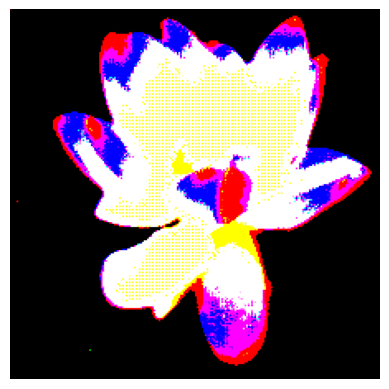

In [64]:
draw(test_output2.squeeze())

In [67]:
picasso = decodeImage("picasso.jpg")
dancing = decodeImage("dancing.jpg")

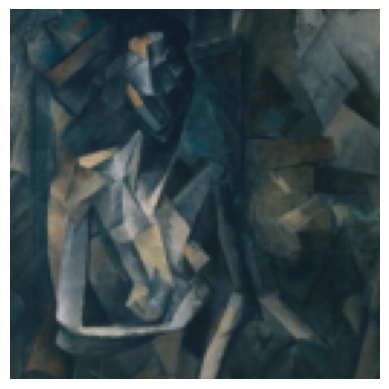

In [68]:
draw(picasso)

In [77]:
picasso_t = preprocess(picasso).unsqueeze(0)
dancing_t = preprocess(dancing).unsqueeze(0)

In [81]:
test_output3 = run_style_transfer(torchvision.models.vgg19().features.eval(), cnn_normalization_mean, cnn_normalization_std,
                            dancing_t, picasso_t, dancing_t.clone())

Building the style transfer model..


C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3782267448.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3782267448.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..


ValueError: not enough values to unpack (expected 4, got 3)

torch.Size([1, 3, 224, 224])


TypeError: Invalid shape (1, 3, 224, 224) for image data

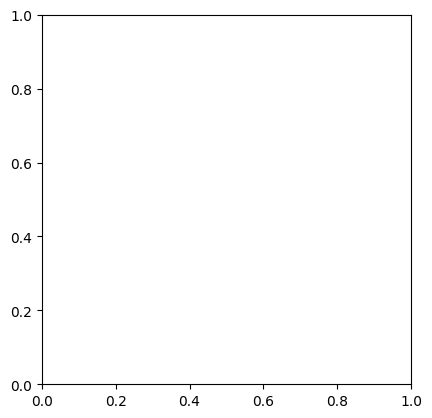

In [79]:
print(test_output3.shape)
plt.figure()
plt.imshow(test_output3.detach().numpy())
#draw(test_output3.squeeze())

In [94]:
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no GPU

loader = torchvision.transforms.Compose([
    torchvision.transforms.Resize([imsize, imsize]),  # scale imported image
    torchvision.transforms.ToTensor()])  # transform it into a torch tensor

unloader = torchvision.transforms.ToPILImage()

def image_loader(image_name):
    image = torchvision.io.read_image(image_name)
    image = unloader(image)
    #image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image


In [95]:
picasso1 = image_loader("picasso.jpg")
dancing1 = image_loader("dancing.jpg")
input_img = dancing1.clone()

In [96]:
test_output4 = run_style_transfer(torchvision.models.vgg19().features.eval(), cnn_normalization_mean, cnn_normalization_std,
                            dancing1, picasso1, input_img)

Building the style transfer model..


C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3782267448.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3782267448.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [50]:
Style Loss : 0.000894 Content Loss: 0.005809

run [100]:
Style Loss : 0.000833 Content Loss: 0.005998

run [150]:
Style Loss : 0.023369 Content Loss: 0.007505

run [200]:
Style Loss : 27.503397 Content Loss: 0.356499

run [250]:
Style Loss : 0.001651 Content Loss: 0.018603

run [300]:
Style Loss : 0.000831 Content Loss: 0.008947



In [97]:
print(test_output4.shape)

torch.Size([1, 3, 128, 128])


In [98]:
print(test_output4.squeeze().shape)

torch.Size([3, 128, 128])


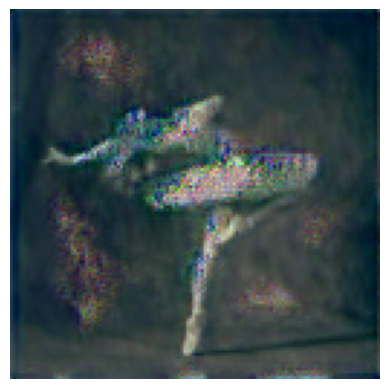

In [99]:
draw(test_output4.squeeze())

In [100]:
garfield1 = image_loader("garfield_image_0013.jpg")
style1_1 = image_loader(style_path1)
input_img1 = garfield1.clone()

In [101]:
test_output5 = run_style_transfer(torchvision.models.vgg19().features.eval(), cnn_normalization_mean, cnn_normalization_std,
                            garfield1, style1_1, input_img1)

Building the style transfer model..


C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3782267448.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3782267448.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [50]:
Style Loss : 0.002941 Content Loss: 0.027157

run [100]:
Style Loss : 0.002723 Content Loss: 0.026233

run [150]:
Style Loss : 0.002933 Content Loss: 0.029152

run [200]:
Style Loss : 0.002566 Content Loss: 0.027093

run [250]:
Style Loss : 0.084448 Content Loss: 0.029320

run [300]:
Style Loss : 0.002433 Content Loss: 0.028787



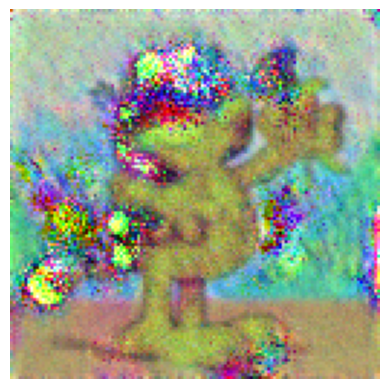

In [102]:
draw(test_output5.squeeze())

In [103]:
other1 = image_loader("image_0013.jpg")
style2_1 = image_loader(style_path2)
input_img2 = other1.clone()

In [104]:
test_output6 = run_style_transfer(torchvision.models.vgg19().features.eval(), cnn_normalization_mean, cnn_normalization_std,
                            other1, style2_1, input_img2)

Building the style transfer model..


C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3782267448.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3782267448.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [50]:
Style Loss : 0.292509 Content Loss: 0.066749

run [100]:
Style Loss : 0.002842 Content Loss: 0.041022

run [150]:
Style Loss : 0.002244 Content Loss: 0.031483

run [200]:
Style Loss : 0.017090 Content Loss: 0.045852

run [250]:
Style Loss : 0.002215 Content Loss: 0.029166

run [300]:
Style Loss : 0.002064 Content Loss: 0.026858



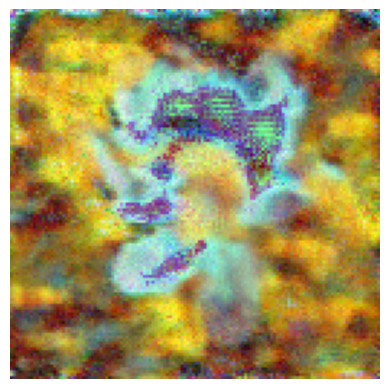

In [105]:
draw(test_output6.squeeze())

In [106]:
style3_1 = image_loader("20200117_032212.jpg")
test_output7 = run_style_transfer(torchvision.models.vgg19().features.eval(), cnn_normalization_mean, cnn_normalization_std,
                            garfield1, style3_1, input_img1)

Building the style transfer model..


C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3782267448.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
C:\Users\julie\AppData\Local\Temp\ipykernel_10636\3782267448.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [50]:
Style Loss : 0.003237 Content Loss: 0.027087

run [100]:
Style Loss : 0.002042 Content Loss: 0.018641

run [150]:
Style Loss : 0.002012 Content Loss: 0.017991

run [200]:
Style Loss : 0.002032 Content Loss: 0.017788

run [250]:
Style Loss : 0.002211 Content Loss: 0.017677

run [300]:
Style Loss : 11.323545 Content Loss: 0.164003



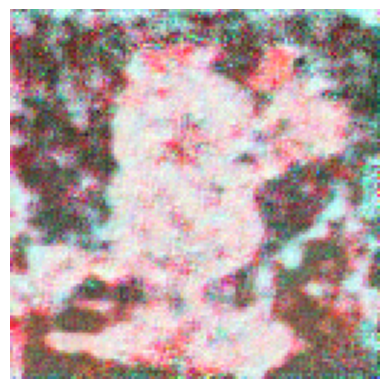

In [107]:
draw(test_output7.squeeze())

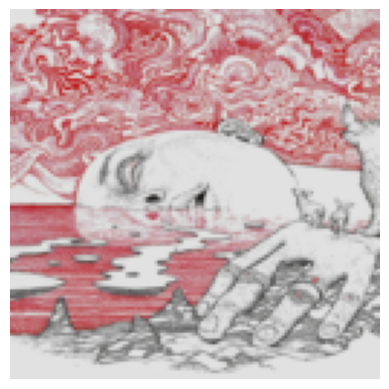

In [111]:
draw(style3_1.squeeze())
#draw(garfield1.squeeze())

## Step 2: Autoencoder

## Step 3: Combine CNN and Autoencoder in Variational Autoencoder